In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\devri\Desktop\datasets\\fifa_eda.csv")
df = data.copy()
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [9]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

Shape of the dataset:  (18207, 18)
_______________________________________
Number of null values: 
ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64
_______________________________________
Number of unique values: 
ID                          18207
Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Value   

In [10]:
df.describe().T.style.set_properties(**{"background-color": "#00000", "font-size" : "12px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
ID,18207.000000,214298.338606,29965.244204,16.000000,200315.500000,221759.000000,236529.500000,246620.000000
Age,18207.000000,25.122206,4.669943,16.000000,21.000000,25.000000,28.000000,45.000000
Overall,18207.000000,66.238699,6.908930,46.000000,62.000000,66.000000,71.000000,94.000000
Potential,18207.000000,71.307299,6.136496,48.000000,67.000000,71.000000,75.000000,95.000000
Value,17955.000000,2444.530214,5626.715434,10.000000,325.000000,700.000000,2100.000000,118500.000000
Wage,18207.000000,9.731312,21.999290,0.000000,1.000000,3.000000,9.000000,565.000000
International Reputation,18159.000000,1.113222,0.394031,1.000000,1.000000,1.000000,1.000000,5.000000
Skill Moves,18159.000000,2.361308,0.756164,1.000000,2.000000,2.000000,3.000000,5.000000
Joined,18207.000000,2016.420607,2.018194,1991.000000,2016.000000,2017.000000,2018.000000,2018.000000
Height,18207.000000,5.946771,0.220514,5.083333,5.750000,5.916667,6.083333,6.750000


In [13]:
# Lets change the "Contract Valid Until" column's data type
df["Contract Valid Until"] = pd.to_datetime(df['Contract Valid Until'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Skill Moves               18159 non-null  float64       
 12  Position          

### Removing NULL values

In [16]:
print(df.isnull().sum())

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64


In [19]:
# Let's focus on CLUB, International Reputation , Skill Moves , Contract Valid Until and VALUE columns first
# if all columns have null values present then we will remove it
#np.where works like this np.where("condition", "if_true", "if_false")
df_try1 = df.copy()
df_try1["compare"] = np.where(df_try1["Value"].isna()
                              & df_try1["Club"].isna()
                              & df_try1["International Reputation"].isna()
                              & df_try1["Skill Moves"].isna()
                              & df_try1["Contract Valid Until"].isna() , "remove it" , "don't remove it")
df_try1[df_try1["compare"] == "remove it"]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare


We found out there are no such columns where all null values are present

In [20]:
#Let's focus on CLUB,Contract Valid Until,and VALUE columns first
# if all three columns have null values present then we assign some values to it because it migh haapen that player has not been assigned to any Club

#np.where works like this np.where("condition", "if_true", "if_false")

df_club_value_contract = df.copy()
df_club_value_contract["compare"] = np.where(df_club_value_contract["Value"].isna()
                              & df_club_value_contract["Club"].isna() 
                              & df_club_value_contract["Contract Valid Until"].isna(),
                              "remove it" , "don't remove it")

df_club_value_contract_NULL= df_club_value_contract[df_club_value_contract["compare"] == "remove it"]
df_club_value_contract_NULL


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare
452,207439,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaT,5.916667,165.0,4585.060806,remove it
538,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaT,6.333333,185.0,4585.060806,remove it
568,229909,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806,remove it
677,187347,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaT,5.833333,154.0,4585.060806,remove it
874,187607,A. Dzyuba,29,Russia,78,78,NaN,NaN,0.0,Right,2.0,3.0,ST,2016,NaT,6.416667,201.0,4585.060806,remove it
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,India,55,64,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806,remove it
17215,243131,K. Taimi,26,Finland,55,57,NaN,NaN,0.0,Right,1.0,2.0,RB,2016,NaT,6.333333,187.0,4585.060806,remove it
17339,233526,S. Passi,23,India,54,63,NaN,NaN,0.0,Right,1.0,2.0,RM,2016,NaT,5.750000,143.0,4585.060806,remove it
17436,236452,D. Lalhlimpuia,20,India,54,67,NaN,NaN,0.0,Right,1.0,2.0,GK,2016,NaT,6.000000,168.0,4585.060806,remove it


We found out there are few columns where Club,Contract Valid Until and Values are null together

In [21]:
# Let's try to change in our trial dataset first
for ID in df_club_value_contract_NULL['ID']:
    df_try1.loc[df_try1["ID"] == ID,"Club"] = "Not Assigned"
    df_try1.loc[df_try1["ID"] == ID,"Value"] = 0.0
    df_try1.loc[df_try1["ID"] == ID,"Contract Valid Until"] = pd.to_datetime("today").strftime("%m/%d/%Y")

In [22]:
df_try1[df_try1["ID"]== 207439]
# It's working

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare
452,207439,L. Paredes,24,Argentina,80,85,Not Assigned,0.0,0.0,Right,2.0,4.0,CM,2016,2022-09-22,5.916667,165.0,4585.060806,don't remove it


In [23]:
#Let's make changes to real dataset
for ID in df_club_value_contract_NULL['ID']:
    df.loc[df["ID"] == ID,"Club"] = "Not Assigned"
    df.loc[df["ID"] == ID,"Value"] = 0.0
    df.loc[df["ID"] == ID,"Contract Valid Until"] = pd.to_datetime("today").strftime("%m/%d/%Y")

In [24]:
df[df["ID"]== 207439]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,Not Assigned,0.0,0.0,Right,2.0,4.0,CM,2016,2022-09-22,5.916667,165.0,4585.060806


In [25]:
df.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       11
Wage                         0
Preferred Foot               0
International Reputation    48
Skill Moves                 48
Position                     0
Joined                       0
Contract Valid Until        48
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [26]:
# Let's remove all rest of the NULL values present. As it is very less.
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

### EDA

In [28]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [29]:
df.shape

(18148, 18)

In [30]:
# Finding Correlation between all the columns with each other
corr=df.corr()
corr.style.background_gradient(cmap='Blues')

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.738729,-0.421034,0.043974,-0.139837,-0.206390,-0.355838,-0.058156,0.205639,-0.089547,-0.190950,-0.122114
Age,-0.738729,1.000000,0.456399,-0.250177,0.076295,0.142404,0.253239,0.028593,-0.201033,0.082210,0.230066,0.058946
Overall,-0.421034,0.456399,1.000000,0.660742,0.627186,0.571875,0.499776,0.414015,-0.170491,0.039078,0.155160,0.598509
Potential,0.043974,-0.250177,0.660742,1.000000,0.576962,0.486891,0.373703,0.353757,-0.049353,-0.009111,-0.006313,0.564071
Value,-0.139837,0.076295,0.627186,0.576962,1.000000,0.858401,0.654137,0.315693,-0.114828,0.002769,0.046088,0.972270
Wage,-0.206390,0.142404,0.571875,0.486891,0.858401,1.000000,0.669431,0.263172,-0.143353,0.019744,0.064911,0.828343
International Reputation,-0.355838,0.253239,0.499776,0.373703,0.654137,0.669431,1.000000,0.207984,-0.132303,0.035078,0.088615,0.621525
Skill Moves,-0.058156,0.028593,0.414015,0.353757,0.315693,0.263172,0.207984,1.000000,0.020678,-0.422526,-0.351073,0.297581
Joined,0.205639,-0.201033,-0.170491,-0.049353,-0.114828,-0.143353,-0.132303,0.020678,1.000000,0.002158,-0.027050,-0.115774
Height,-0.089547,0.082210,0.039078,-0.009111,0.002769,0.019744,0.035078,-0.422526,0.002158,1.000000,0.754627,0.001835


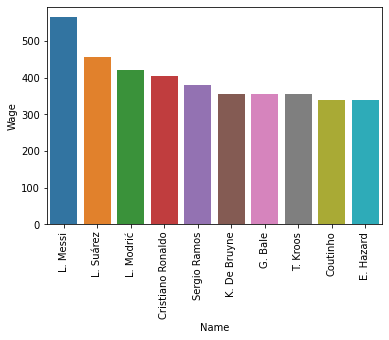

In [37]:
df_max_wage = df.sort_values(by ='Wage', ascending = 0).head(10)
fig, ax = plt.subplots()
ax1 = sns.barplot(x="Name", y="Wage", data=df_max_wage, label="Club")
for item in ax1.get_xticklabels():
    item.set_rotation(90)

In [38]:
df_nationality_counts = df["Nationality"].value_counts()
df_top_nationality_counts = df_nationality_counts[df_nationality_counts > 250]
df_top_nationality_counts

England                1655
Germany                1195
Spain                  1071
Argentina               936
France                  910
Brazil                  824
Italy                   699
Colombia                615
Japan                   475
Netherlands             452
Sweden                  396
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  348
Norway                  340
Saudi Arabia            336
Denmark                 335
Korea Republic          333
Portugal                322
Turkey                  303
Austria                 296
Scotland                283
Belgium                 259
Name: Nationality, dtype: int64

Text(0.5, 1.0, 'No. of Players by Nations')

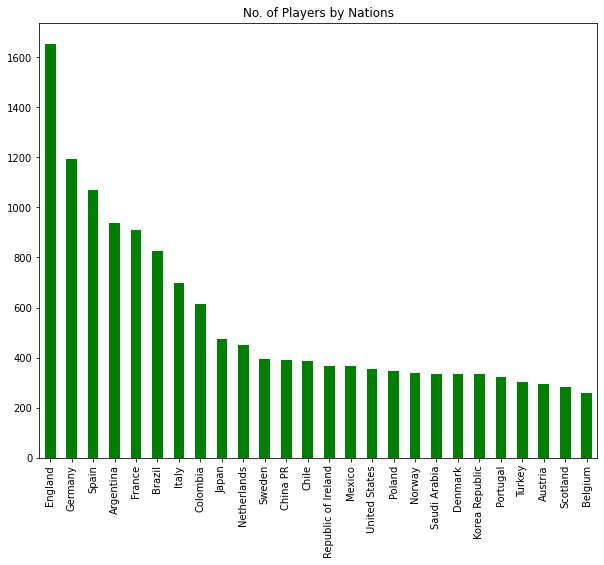

In [42]:
df_top_nationality_counts.plot.bar(figsize=(10,8), color="g")
plt.title("No. of Players by Nations")

In [43]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')